In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Define the path to the dataset
file_path = '/kaggle/input/titanic/titanic.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm successful loading
print(df.head())


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Columns Described:
* Survived: Indicator if the passenger survived (1) or not (0).
* Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
* Age: Age of the passengers.
* Siblings/Spouses Aboard: Number of siblings or spouses aboard.
* Parents/Children Aboard: Number of parents or children aboard.
* Fare: Ticket fare paid by the passenger.

# Statistical Summary Explained:
1. Count (887):
This indicates there are 887 entries in each column, providing a consistent dataset without missing values for these fields.

1. Mean:
 Survived: About 38.56% of the passengers in this sample survived.
 Pclass: The average passenger class is about 2.31, suggesting a higher proportion of lower-class (second and third) passengers.
 Age: The average age is approximately 29.47 years.
 Siblings/Spouses Aboard: On average, passengers had about 0.53 siblings or spouses aboard.
 Parents/Children Aboard: On average, passengers had about 0.38 parents or children aboard.
 Fare: The average fare paid was about $32.31, which varies significantly given the high standard deviation.

1. Standard Deviation (std):
Indicates the variability in each column. Notably, the fare has a high standard deviation (49.78) compared to the mean, indicating a wide range of ticket prices.

1. Minimum (min):
Every minimum value aligns with possible lower bounds for each category, e.g., the youngest passenger was about 0.42 years old, and the minimum fare is $0.00, suggesting some passengers traveled for free.

1. Percentiles (25%, 50%, 75%):
These values give a better sense of the distribution of data:
25%: 25% of passengers did not survive, were in second class, were younger than 20.25 years, and did not have siblings/spouses or parents/children aboard.
50% (Median): Half of the passengers were in third class, were about 28 years old, and similarly did not have siblings/spouses or parents/children aboard. The median fare was about $14.45.
75%: 75% of passengers were in third class, were under 38 years old, might have had one sibling/spouse aboard, and did not have parents/children aboard. The higher-end fare was around $31.14.

1. Maximum (max):
The maximum values indicate extremes in the dataset, such as the oldest passenger being 80 years old, one having 8 siblings/spouses aboard, and another having 6 parents/children aboard. The highest fare was $512.33.

# Insights and Implications:
This summary provides crucial insights for deeper analyses:

* Survival Rates: Could be analyzed further by class, fare, or family aboard to find patterns.
* Demographic Studies: Age and class distributions can inform discussions on demographics and socio-economic status.
* Family Connections: High values for siblings/spouses and parents/children suggest some passengers were part of large families, impacting their survival strategy and experiences.
* Fare Analysis: A deeper look into how fares correlate with survival and passenger class could reveal socio-economic dynamics affecting survival chances.

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
882    False
883    False
884    False
885    False
886    False
Length: 887, dtype: bool

In [6]:
df[df.duplicated(keep = False)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


In [7]:
missing_values = df.isna().sum()
print(missing_values)


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [8]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [9]:
# Count the number of unique classes in the 'Pclass' column
num_classes = df['Pclass'].nunique()

print(f"There are {num_classes} classes in the Pclass column.")

There are 3 classes in the Pclass column.


In [10]:
# Assuming df is your DataFrame and Pclass is still an existing column
unique_pclass_count = df['Pclass'].nunique()

print("Number of unique values in Pclass:", unique_pclass_count)


Number of unique values in Pclass: 3


In [11]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


1. Age and Pclass (-0.39): A moderate negative correlation suggests that younger passengers tend to be in lower (numerically higher) passenger classes (e.g., 3rd class).
1. Fare and Pclass (-0.56): A strong negative correlation indicates that passengers in higher classes (numerically lower, e.g., 1st class) tend to pay higher fares. This is expected as higher classes generally offer better amenities and services.
1. Survived and Pclass (-0.32): This moderate negative correlation suggests that passengers in higher classes had a higher survival rate. This might reflect that higher class passengers had better access to lifeboats or other survival resources during the disaster.
1. Survived and Fare (0.24): A positive correlation indicates that passengers who paid higher fares had slightly higher survival rates, which might correlate with higher class or better access to emergency resources.
1. Siblings/Spouses Aboard and Parents/Children Aboard (0.41): This positive correlation shows that passengers with siblings or spouses on board also tended to have parents or children aboard. This might reflect families traveling together.
1. Age and Siblings/Spouses Aboard (-0.31), Age and Parents/Children Aboard (-0.21): These negative correlations suggest that older passengers were less likely to have either siblings/spouses or parents/children aboard, possibly reflecting older individuals traveling alone or with a spouse rather than as part of larger family units.


In [12]:
print(df['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
882    2
883    1
884    3
885    1
886    3
Name: Pclass, Length: 887, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


# Feature Engineering

In [15]:
# Define the age categorization function
def categorize_age(age):
    if pd.isnull(age):
        return "Unknown"  # Handles blank ages
    elif age <= 2:
        return "Baby (0-2)"  # Includes age 2
    elif age <= 10:
        return "Child (3-10)"  # Includes ages 3 to 10
    elif age <= 20:
        return "Teenager (11-20)"  # Includes ages 11 to 20
    elif age <= 40:
        return "Young (21-40)"  # Includes ages 21 to 40
    elif age <= 75:
        return "Middle-aged (41-75)"  # Includes ages 41 to 75
    elif age > 75:
        return "Elderly (>75)"  # Everything above age 75
    else:
        return "Unknown"  # Fallback for any other conditions

# Apply the categorize_age function to create a new 'Age_Group' column
df['Age_Group'] = df['Age'].apply(categorize_age)

# Creating Family Size column
df['Family_Size'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

# Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Mapping Titles to category
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Rare", "Rev": "Rare", 
    "Col": "Rare", "Major": "Rare", "Mlle": "Miss", "Countess": "Rare", "Ms": "Miss", "Lady": "Rare", 
    "Jonkheer": "Rare", "Don": "Rare", "Dona": "Rare", "Sir": "Rare", "Capt": "Rare", "Mme": "Mrs"
}
df['Title'] = df['Title'].map(title_mapping)

# Converting categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Age_Group', 'Title', 'Pclass'], drop_first=True)


When using one-hot encoding to transform the PClass variable into dummy variables, it's a common practice in statistical modeling and machine learning to drop one category to avoid the issue of multicollinearity. This dropped category typically becomes the "reference category" or "baseline" against which the other categories are compared. Let's discuss this approach and its implications:

Understanding One-Hot Encoding with a Dropped Category
In your dataset:

PClass has three categories: 1, 2, and 3.
When you apply one-hot encoding and choose to drop the first category (which is a common approach when using functions like pandas.get_dummies with drop_first=True), you get:

Pclass_2: This column will be True if the passenger is in 2nd class and False otherwise.
Pclass_3: This column will be True if the passenger is in 3rd class and False otherwise.
Here, 1st class is implicitly encoded by both Pclass_2 and Pclass_3 being False. This means:

If Pclass_2 is False and Pclass_3 is False, the passenger is in 1st class.
Benefits of Dropping One Category
Avoiding Multicollinearity: By dropping one category, you prevent perfect multicollinearity, where the one-hot-encoded columns can perfectly predict each other (i.e., if you know Pclass_2 and Pclass_3, you automatically know if it's Pclass_1). This is crucial for models that are sensitive to multicollinearity, like linear regression.
Reduction in Redundancy: It reduces the number of input features, simplifying the model without losing any information.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Name                           887 non-null    object 
 2   Age                            887 non-null    float64
 3   Siblings/Spouses Aboard        887 non-null    int64  
 4   Parents/Children Aboard        887 non-null    int64  
 5   Fare                           887 non-null    float64
 6   Family_Size                    887 non-null    int64  
 7   Sex_male                       887 non-null    bool   
 8   Age_Group_Child (3-10)         887 non-null    bool   
 9   Age_Group_Elderly (>75)        887 non-null    bool   
 10  Age_Group_Middle-aged (41-75)  887 non-null    bool   
 11  Age_Group_Teenager (11-20)     887 non-null    bool   
 12  Age_Group_Young (21-40)        887 non-null    boo

In [17]:
df.head(5)

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Sex_male,Age_Group_Child (3-10),Age_Group_Elderly (>75),Age_Group_Middle-aged (41-75),Age_Group_Teenager (11-20),Age_Group_Young (21-40),Pclass_2,Pclass_3
0,0,Mr. Owen Harris Braund,22.0,1,0,7.2500,1,True,False,False,False,False,True,False,True
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,1,False,False,False,False,False,True,False,False
2,1,Miss. Laina Heikkinen,26.0,0,0,7.9250,0,False,False,False,False,False,True,False,True
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,False,False,False,False,False,True,False,False
4,0,Mr. William Henry Allen,35.0,0,0,8.0500,0,True,False,False,False,False,True,False,True


In [18]:
# Extract titles using a regular expression that looks for a word before a dot (".")
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')


In [19]:
# Count occurrences of each title
title_counts = df['Title'].value_counts()


In [20]:
# Print the counts of each title
print(title_counts)

Title
Mr          513
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


# Analysis

1. Demographic Distribution
Mr (513): The most common title, typically referring to adult men. This large number indicates a predominantly male passenger list.
Miss (182) and Mrs (125): These titles indicate female passengers, with "Miss" used for unmarried women and "Mrs" for married women. The significant number of women, especially unmarried women ("Miss"), could reflect young women traveling with families or alone.
Master (40): A title used for boys and young men, suggesting a fair number of children and teenagers on board.

2. Professional and Social Status
Dr (7): Medical doctors or Ph.D. holders, indicating the presence of highly educated individuals among the passengers.
Rev (6): Reverends, suggesting the presence of clergy aboard.
Col (2), Major (2), Capt (1): Military titles indicating the presence of military personnel or retirees with a background in the armed forces. The "Capt" might also refer to a maritime captain.

3. Nobility and Rare Titles
Sir (1), Lady (1), Countess (1), Jonkheer (1): Titles associated with nobility or aristocracy, pointing to the upper echelons of society being present. "Jonkheer" is a Dutch honorific for nobility not entitled to other noble titles.
Don (1): A title used in Spanish-speaking countries, also denoting a person of high stature, possibly nobility.

4. Cultural Variations and Anomalies
Mlle (2) and Mme (1): French titles, where "Mlle" is an abbreviation for "Mademoiselle" (used for unmarried women) and "Mme" for "Madame" (used for married women). This suggests the presence of French passengers or those from French-speaking regions.
Ms (1): A modern title for women regardless of marital status, which was less common at the time of the Titanic and suggests a forward-thinking or progressive individual.

5. Special Cases
Capt (1): Could also refer to a naval or ship captain, though in this context, likely indicates a military rank.
Summary of Insights
Gender Balance: There is a significant number of both males and females, with males being predominant.
Age and Status: Presence of children ("Master"), married and unmarried women ("Mrs" and "Miss"), and working professionals ("Dr", "Rev").
Social Hierarchy: Clear indications of social stratification from working class to upper class (nobility).
Cultural Diversity: Indications of a culturally diverse passenger list with different nationalities and backgrounds.

In [21]:
# Extract titles
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')

# Map titles to categories (simplified version)
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Professional", "Rev": "Professional", "Col": "Military",
    "Major": "Military", "Capt": "Military", "Jonkheer": "Nobility",
    "Don": "Nobility", "Sir": "Nobility", "Lady": "Nobility",
    "Countess": "Nobility", "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"
}
df['Title'] = df['Title'].map(title_mapping).fillna('Other')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Name                           887 non-null    object 
 2   Age                            887 non-null    float64
 3   Siblings/Spouses Aboard        887 non-null    int64  
 4   Parents/Children Aboard        887 non-null    int64  
 5   Fare                           887 non-null    float64
 6   Family_Size                    887 non-null    int64  
 7   Sex_male                       887 non-null    bool   
 8   Age_Group_Child (3-10)         887 non-null    bool   
 9   Age_Group_Elderly (>75)        887 non-null    bool   
 10  Age_Group_Middle-aged (41-75)  887 non-null    bool   
 11  Age_Group_Teenager (11-20)     887 non-null    bool   
 12  Age_Group_Young (21-40)        887 non-null    boo

In [23]:
# Survival rate by Title
survival_by_title = df.groupby('Title')['Survived'].mean()
print("Survival Rate by Title:")
print(survival_by_title)

# Survival rate by Gender
survival_by_gender = df.groupby('Sex_male')['Survived'].mean()
print("\nSurvival Rate by Gender (1 for male, 0 for female):")
print(survival_by_gender)

# Survival rate by Class for Pclass_2
survival_by_Pclass_2 = df.groupby('Pclass_2')['Survived'].mean()
print("\nSurvival Rate by Class_2 :")
print(survival_by_Pclass_2)

# Survival rate by Class for Pclass_3
survival_by_Pclass_3 = df.groupby('Pclass_3')['Survived'].mean()
print("\nSurvival Rate by Class_3 :")
print(survival_by_Pclass_3)


Survival Rate by Title:
Title
Master          0.575000
Military        0.400000
Miss            0.702703
Mr              0.157895
Mrs             0.793651
Nobility        0.600000
Professional    0.230769
Name: Survived, dtype: float64

Survival Rate by Gender (1 for male, 0 for female):
Sex_male
False    0.742038
True     0.190227
Name: Survived, dtype: float64

Survival Rate by Class_2 :
Pclass_2
False    0.362731
True     0.472826
Name: Survived, dtype: float64

Survival Rate by Class_3 :
Pclass_3
False    0.557500
True     0.244353
Name: Survived, dtype: float64


# Interpretation of Survival Rates:

1. Survival Rate by Title:
Master: Relatively high survival rate of 57.5%, typically young boys given priority in life-saving situations.
Military: Lower survival rate of 40%, possibly reflecting duty-bound personnel staying on board until the end.
Miss: High survival rate of 70.27%, generally younger unmarried women.
Mr: Very low survival rate of 15.79%, adult males generally had lower priority for lifeboats.
Mrs: Very high survival rate of 79.37%, married women, often given priority.
Nobility: 60% survival rate, which indicates a somewhat higher chance due to status but not as high as might be expected.
Professional: Low survival rate of 23.08%, could include professions like engineers, doctors, which might stay to help others.

1. Survival Rate by Gender:
Male (True): Very low survival rate of 19.02%, which aligns with historical accounts where women and children were given lifeboat priority.
Female (False): High survival rate of 74.2%, highlighting the "women and children first" protocol.

1. Survival Rate by Passenger Class:
Second Class (True): 47.28% survival rate, intermediate between first and third classes.
Second Class (False): This represents first and third class combined, with a survival rate of 36.27%, which is lower due to the inclusion of third class.
Third Class (True): 24.44% survival rate, significantly lower due to worse conditions and lower priority for lifeboats.
Third Class (False): This likely includes first and second classes combined, showing a higher survival rate of 55.75%.

# Insights and Implications:
Gender and Age Impact: The data strongly supports historical accounts that gender and age (especially young titles like Master and Miss) significantly influenced survival chances.
Social Status and Profession: Titles reflecting higher social status (Mrs, Nobility) or family status (Mrs) show better survival rates than those associated with lower social standing or professional duties (Mr, Professional).
Class Differences: Clear differences in survival rates across classes highlight the socio-economic disparities in life-saving opportunities on the Titanic.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Name                           887 non-null    object 
 2   Age                            887 non-null    float64
 3   Siblings/Spouses Aboard        887 non-null    int64  
 4   Parents/Children Aboard        887 non-null    int64  
 5   Fare                           887 non-null    float64
 6   Family_Size                    887 non-null    int64  
 7   Sex_male                       887 non-null    bool   
 8   Age_Group_Child (3-10)         887 non-null    bool   
 9   Age_Group_Elderly (>75)        887 non-null    bool   
 10  Age_Group_Middle-aged (41-75)  887 non-null    bool   
 11  Age_Group_Teenager (11-20)     887 non-null    bool   
 12  Age_Group_Young (21-40)        887 non-null    boo

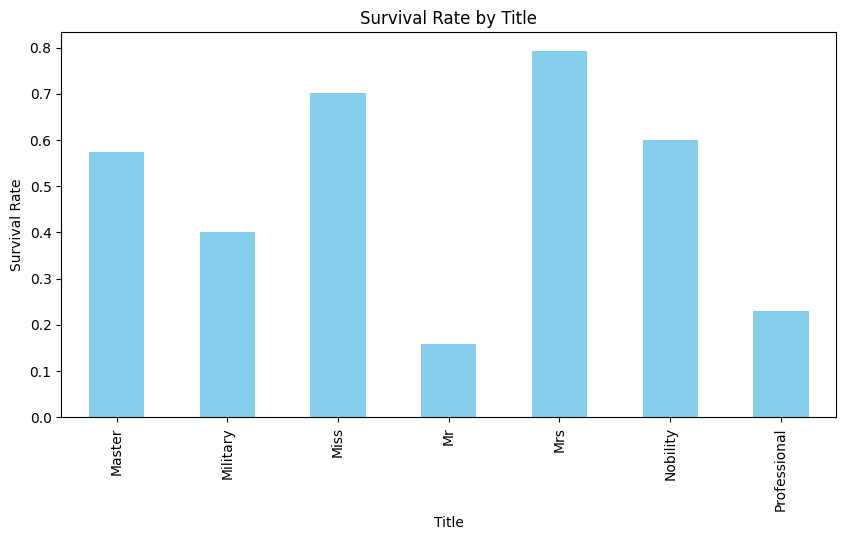

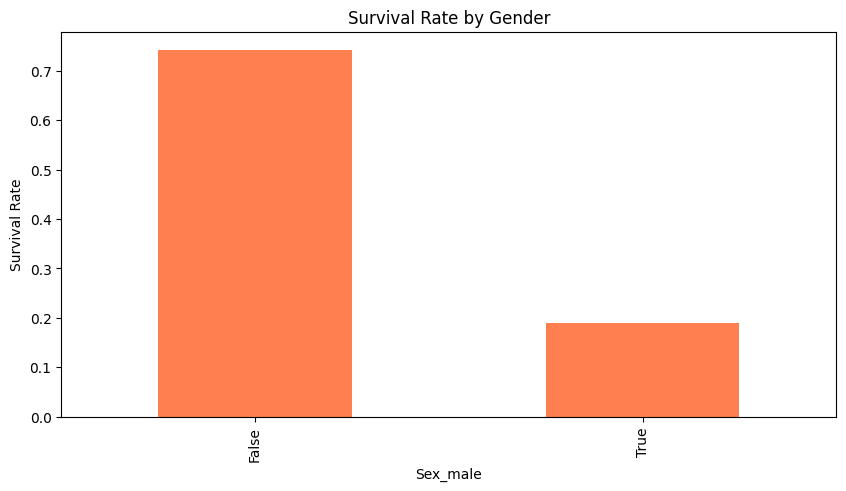

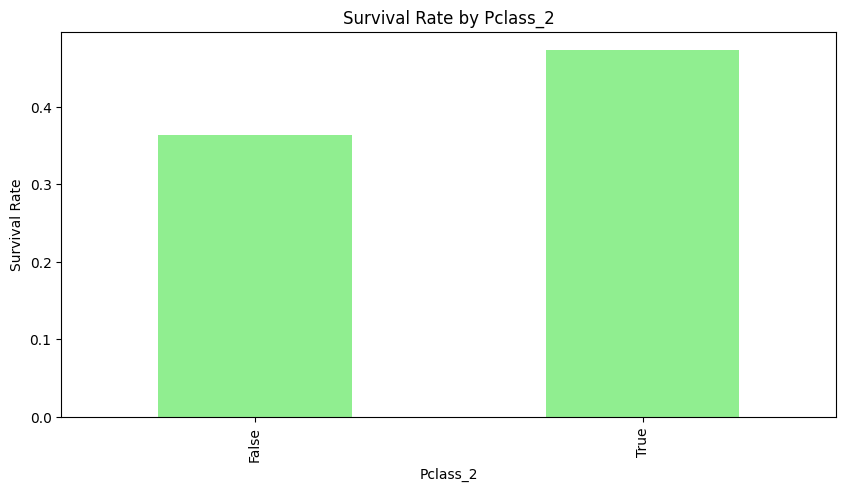

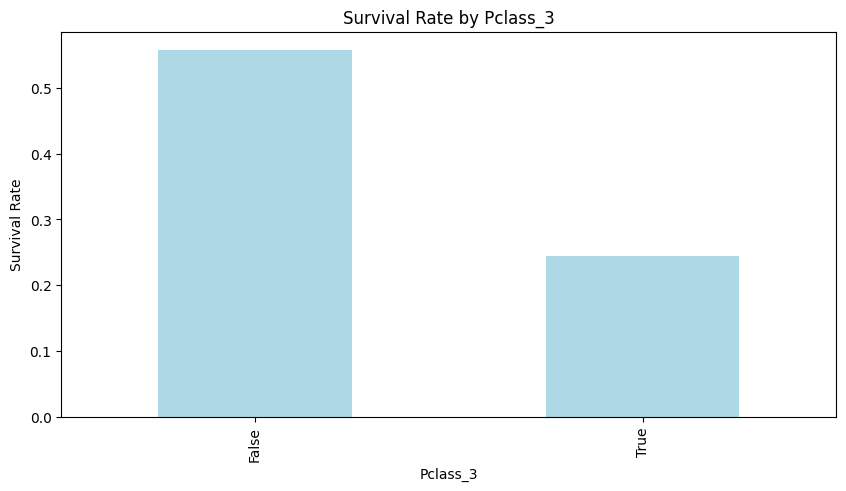

In [25]:
# Plot survival rate by Title
plt.figure(figsize=(10, 5))
survival_by_title.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.show()

# Plot survival rate by Gender
plt.figure(figsize=(10, 5))
survival_by_gender.plot(kind='bar', color='coral')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Plot survival rate by Pclass_2
plt.figure(figsize=(10, 5))
survival_by_Pclass_2.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Pclass_2')
plt.ylabel('Survival Rate')
plt.show()

# Plot survival rate by Pclass_3
plt.figure(figsize=(10, 5))
survival_by_Pclass_3.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Pclass_3')
plt.ylabel('Survival Rate')
plt.show()



In [26]:
def categorize_fare(fare):
    if pd.isnull(fare):
        return "Unknown"  # Handles missing fare values
    elif fare < 20:
        return "Economy-Class"
    elif 20 <= fare < 50:
        return "Business-Class"
    elif fare >= 50:
        return "First-Class"
    else:
        return "Unknown"  # Fallback for any other conditions


In [27]:
# Assuming df is your DataFrame already loaded with fare data
df['Fare_Class'] = df['Fare'].apply(categorize_fare)


In [28]:
# Ensure this part of the code runs without errors
df['Fare_Category'] = df['Fare'].apply(categorize_fare)

# Immediately check if the column is created
print(df.head())
print(df['Fare_Category'].unique())  # This will show all unique values in the 'Fare_Category' column


   Survived                                               Name   Age  \
0         0                             Mr. Owen Harris Braund  22.0   
1         1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  38.0   
2         1                              Miss. Laina Heikkinen  26.0   
3         1        Mrs. Jacques Heath (Lily May Peel) Futrelle  35.0   
4         0                            Mr. William Henry Allen  35.0   

   Siblings/Spouses Aboard  Parents/Children Aboard     Fare  Family_Size  \
0                        1                        0   7.2500            1   
1                        1                        0  71.2833            1   
2                        0                        0   7.9250            0   
3                        1                        0  53.1000            1   
4                        0                        0   8.0500            0   

   Sex_male  Age_Group_Child (3-10)  Age_Group_Elderly (>75)  \
0      True                   False     

In [29]:
print(df.columns)  # Check all columns in DataFrame


Index(['Survived', 'Name', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'Family_Size', 'Sex_male',
       'Age_Group_Child (3-10)', 'Age_Group_Elderly (>75)',
       'Age_Group_Middle-aged (41-75)', 'Age_Group_Teenager (11-20)',
       'Age_Group_Young (21-40)', 'Pclass_2', 'Pclass_3', 'Title',
       'Fare_Class', 'Fare_Category'],
      dtype='object')


In [30]:
print(df['Fare'].describe())  # Get summary statistics of the Fare column


count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64


In [31]:
# Assume categorize_fare has been defined correctly as provided
df['Fare_Category'] = df['Fare'].apply(categorize_fare)

# Assuming 'Survived' column exists, calculate survival rates by fare category
survival_rates = df.groupby('Fare_Category')['Survived'].mean()

# Print the results
print(survival_rates)


Fare_Category
Business-Class    0.418605
Economy-Class     0.279843
First-Class       0.677019
Name: Survived, dtype: float64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Name                           887 non-null    object 
 2   Age                            887 non-null    float64
 3   Siblings/Spouses Aboard        887 non-null    int64  
 4   Parents/Children Aboard        887 non-null    int64  
 5   Fare                           887 non-null    float64
 6   Family_Size                    887 non-null    int64  
 7   Sex_male                       887 non-null    bool   
 8   Age_Group_Child (3-10)         887 non-null    bool   
 9   Age_Group_Elderly (>75)        887 non-null    bool   
 10  Age_Group_Middle-aged (41-75)  887 non-null    bool   
 11  Age_Group_Teenager (11-20)     887 non-null    bool   
 12  Age_Group_Young (21-40)        887 non-null    boo

In [33]:
# Optionally, check the distribution of fare classes
print(df['Fare_Class'].value_counts())


Fare_Class
Economy-Class     511
Business-Class    215
First-Class       161
Name: count, dtype: int64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Name                           887 non-null    object 
 2   Age                            887 non-null    float64
 3   Siblings/Spouses Aboard        887 non-null    int64  
 4   Parents/Children Aboard        887 non-null    int64  
 5   Fare                           887 non-null    float64
 6   Family_Size                    887 non-null    int64  
 7   Sex_male                       887 non-null    bool   
 8   Age_Group_Child (3-10)         887 non-null    bool   
 9   Age_Group_Elderly (>75)        887 non-null    bool   
 10  Age_Group_Middle-aged (41-75)  887 non-null    bool   
 11  Age_Group_Teenager (11-20)     887 non-null    bool   
 12  Age_Group_Young (21-40)        887 non-null    boo

In [35]:
print(df['Pclass_2'])

0      False
1      False
2      False
3      False
4      False
       ...  
882     True
883    False
884    False
885    False
886    False
Name: Pclass_2, Length: 887, dtype: bool


In [36]:
print(df['Pclass_3'])

0       True
1      False
2       True
3      False
4       True
       ...  
882    False
883    False
884     True
885    False
886     True
Name: Pclass_3, Length: 887, dtype: bool


In [37]:
# Define the mapping from Survived column values to labels
survival_status_map = {
    0: "Dead",
    1: "Alive"
}

# Apply the mapping and handle unexpected values
df['Survival_Status'] = df['Survived'].map(survival_status_map).fillna("Unknown")

# Optionally, verify the creation of the new column
print(df[['Survived', 'Survival_Status']].head())


   Survived Survival_Status
0         0            Dead
1         1           Alive
2         1           Alive
3         1           Alive
4         0            Dead


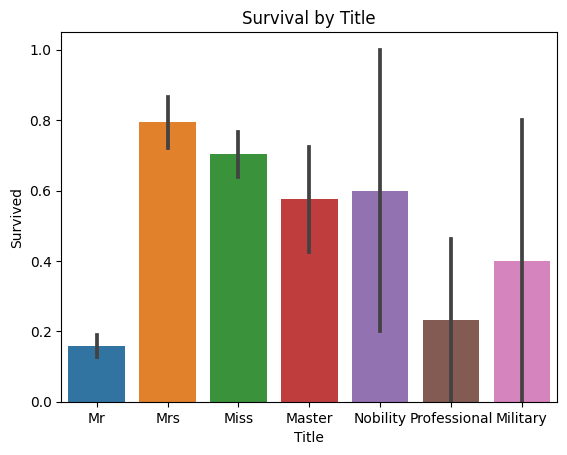

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


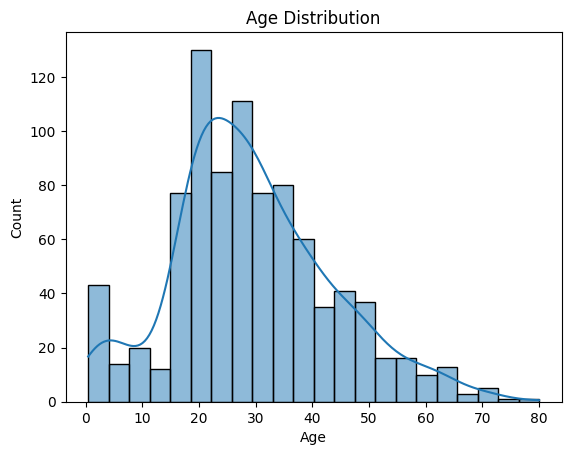

In [38]:
# Survival by Title
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival by Title')
plt.show()

# Distribution of Ages
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


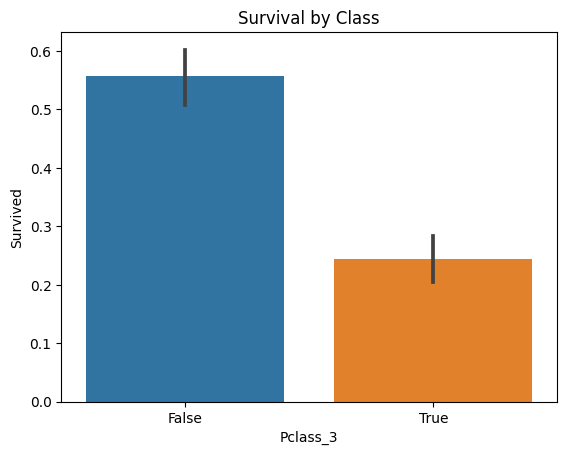

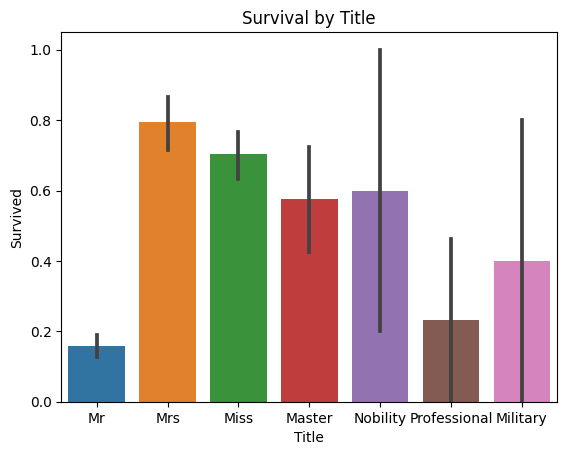

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


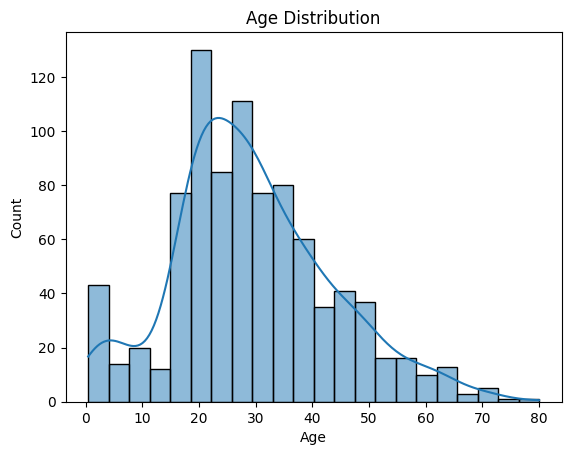

In [39]:
# Survival by Class
sns.barplot(x='Pclass_3', y='Survived', data=df)
plt.title('Survival by Class')
plt.show()

# Survival by Title
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival by Title')
plt.show()

# Distribution of Ages
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


In [40]:
# Assuming categorize_fare is defined and df is your DataFrame
df['Fare_Category'] = df['Fare'].apply(categorize_fare)


In [41]:
# Check for the column existence and create dummies if not
if 'Pclass' in df.columns:
    pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
    df = pd.concat([df, pclass_dummies], axis=1)

if 'Title' in df.columns:
    title_dummies = pd.get_dummies(df['Title'], prefix='Title')
    df = pd.concat([df, title_dummies], axis=1)


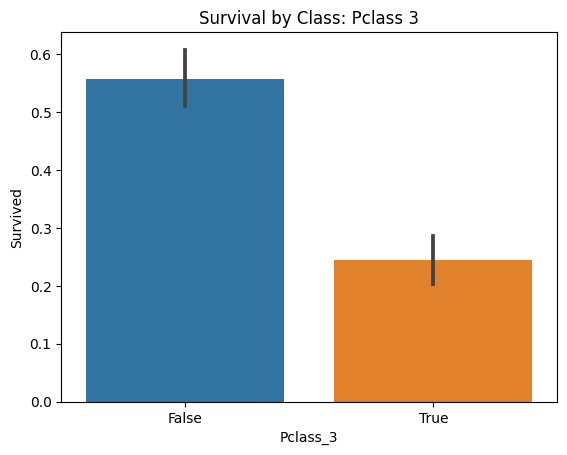

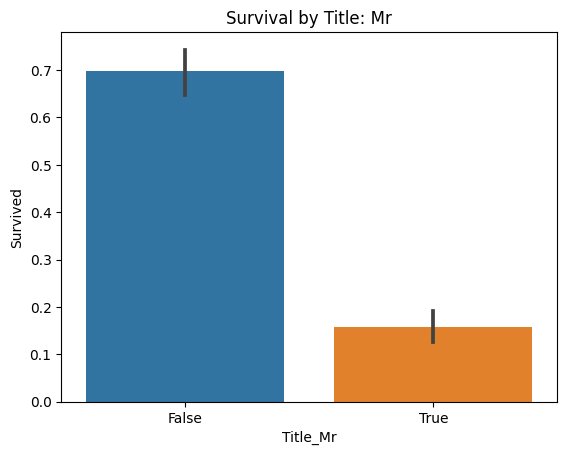

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


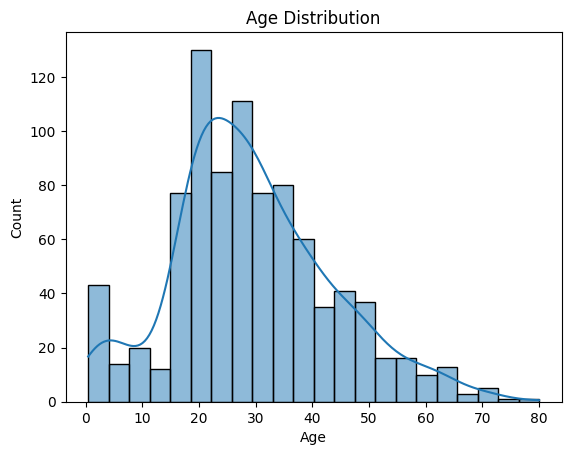

In [42]:
# Survival by Class for Pclass_3 if the dummy exists
if 'Pclass_3' in df.columns:
    sns.barplot(x='Pclass_3', y='Survived', data=df)
    plt.title('Survival by Class: Pclass 3')
    plt.show()

# Survival by Title for Title_Mr if the dummy exists
if 'Title_Mr' in df.columns:
    sns.barplot(x='Title_Mr', y='Survived', data=df)
    plt.title('Survival by Title: Mr')
    plt.show()

# Distribution of Ages (Ensure 'Age' column exists)
if 'Age' in df.columns:
    sns.histplot(df['Age'], kde=True)
    plt.title('Age Distribution')
    plt.show()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Name                           887 non-null    object 
 2   Age                            887 non-null    float64
 3   Siblings/Spouses Aboard        887 non-null    int64  
 4   Parents/Children Aboard        887 non-null    int64  
 5   Fare                           887 non-null    float64
 6   Family_Size                    887 non-null    int64  
 7   Sex_male                       887 non-null    bool   
 8   Age_Group_Child (3-10)         887 non-null    bool   
 9   Age_Group_Elderly (>75)        887 non-null    bool   
 10  Age_Group_Middle-aged (41-75)  887 non-null    bool   
 11  Age_Group_Teenager (11-20)     887 non-null    bool   
 12  Age_Group_Young (21-40)        887 non-null    boo

In [44]:
df.head(5)

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Sex_male,Age_Group_Child (3-10),Age_Group_Elderly (>75),...,Fare_Class,Fare_Category,Survival_Status,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility,Title_Professional
0,0,Mr. Owen Harris Braund,22.0,1,0,7.2500,1,True,False,False,...,Economy-Class,Economy-Class,Dead,False,False,False,True,False,False,False
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,1,False,False,False,...,First-Class,First-Class,Alive,False,False,False,False,True,False,False
2,1,Miss. Laina Heikkinen,26.0,0,0,7.9250,0,False,False,False,...,Economy-Class,Economy-Class,Alive,False,False,True,False,False,False,False
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,False,False,False,...,First-Class,First-Class,Alive,False,False,False,False,True,False,False
4,0,Mr. William Henry Allen,35.0,0,0,8.0500,0,True,False,False,...,Economy-Class,Economy-Class,Dead,False,False,False,True,False,False,False


In [45]:
# Assuming Fare_Class has three categories: Economy-Class, Business-Class, First-Class
fare_class_mapping = {
    "Economy-Class": 1,
    "Business-Class": 2,
    "First-Class": 3
}

# Apply the mapping to convert categories to ordered numbers
df['Fare_Class'] = df['Fare_Class'].map(fare_class_mapping)

In [46]:
df.head(5)

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Sex_male,Age_Group_Child (3-10),Age_Group_Elderly (>75),...,Fare_Class,Fare_Category,Survival_Status,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility,Title_Professional
0,0,Mr. Owen Harris Braund,22.0,1,0,7.2500,1,True,False,False,...,1,Economy-Class,Dead,False,False,False,True,False,False,False
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,1,False,False,False,...,3,First-Class,Alive,False,False,False,False,True,False,False
2,1,Miss. Laina Heikkinen,26.0,0,0,7.9250,0,False,False,False,...,1,Economy-Class,Alive,False,False,True,False,False,False,False
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,False,False,False,...,3,First-Class,Alive,False,False,False,False,True,False,False
4,0,Mr. William Henry Allen,35.0,0,0,8.0500,0,True,False,False,...,1,Economy-Class,Dead,False,False,False,True,False,False,False


In [47]:
df_1 = df.copy()

In [48]:
df_1 = df_1.drop(['Name', 'Title', 'Fare_Category', 'Survival_Status'], axis=1)

In [49]:
bool_cols = df_1.columns[df_1.dtypes == 'bool']
df_1[bool_cols] = df_1[bool_cols].astype(int)


In [50]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Age                            887 non-null    float64
 2   Siblings/Spouses Aboard        887 non-null    int64  
 3   Parents/Children Aboard        887 non-null    int64  
 4   Fare                           887 non-null    float64
 5   Family_Size                    887 non-null    int64  
 6   Sex_male                       887 non-null    int64  
 7   Age_Group_Child (3-10)         887 non-null    int64  
 8   Age_Group_Elderly (>75)        887 non-null    int64  
 9   Age_Group_Middle-aged (41-75)  887 non-null    int64  
 10  Age_Group_Teenager (11-20)     887 non-null    int64  
 11  Age_Group_Young (21-40)        887 non-null    int64  
 12  Pclass_2                       887 non-null    int

# To normalize and apply Min-Max scaling to the Age and Fare columns

## Apply StandardScaler (Normalization) 
## Apply MinMaxScaler

In [51]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Applying Min-Max Scaling to 'Fare'
df_1['Fare'] = min_max_scaler.fit_transform(df_1[['Fare']])

# Applying Standardization to 'Age'
df_1['Age'] = standard_scaler.fit_transform(df_1[['Age']])


In [52]:
print(df_1.head(5))  # Show the first few rows to ensure transformations are correct


   Survived       Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         0 -0.529366                        1                        0   
1         1  0.604265                        1                        0   
2         1 -0.245958                        0                        0   
3         1  0.391709                        1                        0   
4         0  0.391709                        0                        0   

       Fare  Family_Size  Sex_male  Age_Group_Child (3-10)  \
0  0.014151            1         1                       0   
1  0.139136            1         0                       0   
2  0.015469            0         0                       0   
3  0.103644            1         0                       0   
4  0.015713            0         1                       0   

   Age_Group_Elderly (>75)  Age_Group_Middle-aged (41-75)  ...  Pclass_2  \
0                        0                              0  ...         0   
1                       

## Check the Transformed Data

In [53]:
print(df_1[['Age', 'Fare']].head())


        Age      Fare
0 -0.529366  0.014151
1  0.604265  0.139136
2 -0.245958  0.015469
3  0.391709  0.103644
4  0.391709  0.015713


In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Survived                       887 non-null    int64  
 1   Age                            887 non-null    float64
 2   Siblings/Spouses Aboard        887 non-null    int64  
 3   Parents/Children Aboard        887 non-null    int64  
 4   Fare                           887 non-null    float64
 5   Family_Size                    887 non-null    int64  
 6   Sex_male                       887 non-null    int64  
 7   Age_Group_Child (3-10)         887 non-null    int64  
 8   Age_Group_Elderly (>75)        887 non-null    int64  
 9   Age_Group_Middle-aged (41-75)  887 non-null    int64  
 10  Age_Group_Teenager (11-20)     887 non-null    int64  
 11  Age_Group_Young (21-40)        887 non-null    int64  
 12  Pclass_2                       887 non-null    int

# Check correlation

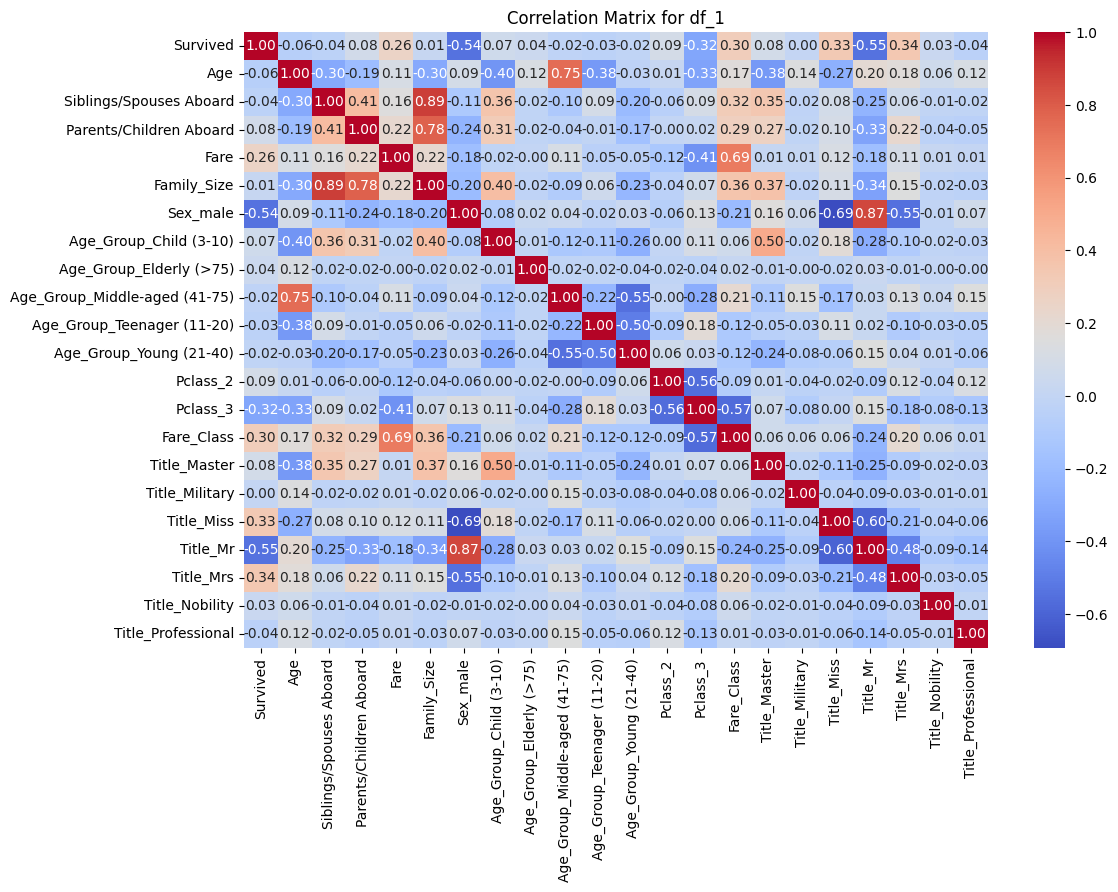

In [55]:
# Assuming df_1 is your DataFrame
correlation_matrix = df_1.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for df_1')
plt.show()


# Specific Observations
* Survived vs. Sex_male: There's a notable negative correlation (approximately -0.54), suggesting that being male decreases the likelihood of survival (likely reflecting historical records where women and children were given priority in life-saving situations).
* Fare vs. Pclass_3: There's a significant negative correlation (about -0.56). This suggests that passengers in the third class generally paid lower fares, which is consistent with historical socio-economic class distinctions.
* Title_Mr vs. Sex_male: The strong positive correlation (close to 1) indicates that the title "Mr." is predominantly associated with males, which is expected.
* Age_Groups: Various age groups (like Age_Group_Child) show distinct correlations with survival, potentially useful for further insights into demographic impacts on survival rates.
* Family_Size vs. Siblings/Spouses Aboard and Parents/Children Aboard: These show high positive correlations (0.89 and 0.78 respectively with Family_Size), indicating that these features are directly related to how Family_Size is derived.

### Load the data 
#df = pd.DataFrame({
#    'Age': df['Age'],
#    'Fare': df['Fare'],
    'Survived': df['Survived'],
    'Pclass': df['Pclass'],
    'Siblings/Spouses Aboard': df['Siblings/Spouses Aboard'],
    'Parents/Children Aboard': df['Parents/Children Aboard']
})

## Drop duplicates
# df = df.drop_duplicates()

# Calculating correlation matrix
#corr = df.corr()

# Plotting the heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
#plt.title('Correlation Between Features')
#plt.show()

In [56]:
# Features and Target from df_1
X = df_1.drop('Survived', axis=1)
y = df_1['Survived']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()


In [58]:
model.fit(X_train, y_train)


LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7584269662921348
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       111
           1       0.69      0.66      0.67        67

    accuracy                           0.76       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.76      0.76       178

Confusion Matrix:
[[91 20]
 [23 44]]


# Interpretation of Results

1. Accuracy (0.76 or 76%): This indicates that your model correctly predicted the survival status for 76% of the test set. While this is a fairly decent accuracy, there's room for improvement, especially considering the balance and distribution of the classes.

1. Precision and Recall:
Class 0 (Did Not Survive):
Precision (0.80): Of all the predictions where the model predicted the passenger did not survive, 80% were correct.
Recall (0.82): Of all the actual non-survivors, the model correctly identified 82%.
Class 1 (Survived):
Precision (0.69): Of all the predictions where the model predicted the passenger survived, 69% were correct.
Recall (0.66): Of all the actual survivors, the model correctly identified 66%.

1. F1-Score:
Class 0 (0.81): The F1-score is a harmonic mean of precision and recall, and a score of 0.81 suggests a reasonably good balance between precision and recall for the non-survivors.
Class 1 (0.67): A lower F1-score for the survivors indicates that there is a more significant trade-off between precision and recall in this class, suggesting room for improvement.

1. Confusion Matrix:
The matrix shows that:
91 true negatives: The model correctly predicted 'did not survive'.
44 true positives: The model correctly predicted 'survived'.
20 false positives: The model incorrectly predicted 'survived' when they did not.
23 false negatives: The model incorrectly predicted 'did not survive' when they did survive.

# Insights
The model performs better at predicting non-survivors than survivors, as indicated by higher scores in accuracy, precision, and recall for class 0.
The number of false negatives and false positives suggests that the model struggles more with identifying true survivors, which might be due to less representation of positive cases in the training data or features that do not differentiate well between the two outcomes.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Update the model initialization with a higher max_iter
model = LogisticRegression(max_iter=10000, solver='saga')  # Increasing max_iter significantly

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit to the data
grid_search.fit(X_train, y_train)

# Output best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))




Best parameters: {'C': 1}
Best cross-validation score: 0.84


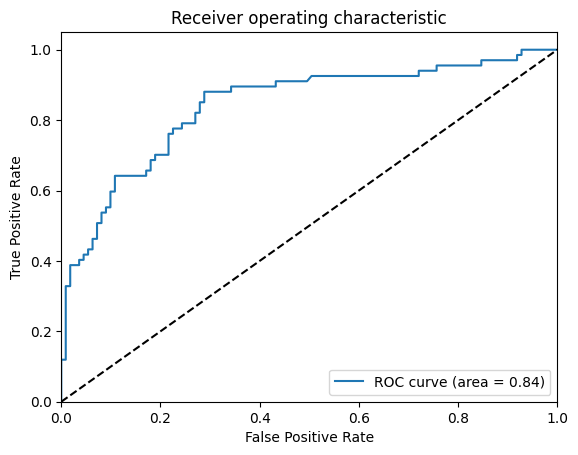

In [61]:
from sklearn.metrics import roc_curve, auc

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



# Understanding the ROC Curve

* ROC Curve: This curve plots the true positive rate (TPR) or recall along the Y-axis against the false positive rate (FPR) along the X-axis at various threshold settings. The TPR indicates how well the model is capturing the actual positives, while the FPR indicates how often the model falsely alarms for the negatives.
* Area Under the Curve (AUC): The AUC value of 0.84 suggests that there's an 84% chance that the model will be able to distinguish between the positive class and the negative class. An AUC value close to 1 indicates excellent model performance, while a value closer to 0.5 suggests no discriminative ability.

# Implications of the ROC Curve and AUC
* Good Discrimination: An AUC of 0.84 indicates good discrimination between positive and negative classes, suggesting that the model is effective at distinguishing between survivors and non-survivors.
* Threshold Selection: The ROC curve allows you to select an optimal threshold based on the trade-off you are willing to accept between sensitivity (true positive rate) and specificity (1 - false positive rate). For instance, if the cost of a false negative (not predicting a survivor) is very high, you might choose a threshold that maximizes the true positive rate, even if it means accepting a higher false positive rate.
* 
* Model Comparisons: If you develop other models for the same prediction task, the ROC curve and AUC provide a straightforward visual and numerical way to compare their performance.

# Final Model Configuration

In [62]:
from sklearn.linear_model import LogisticRegression

# Final Model
final_model = LogisticRegression(C=1, max_iter=10000, solver='saga')  # Ensure using 'saga' if that performed best
final_model.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=10000, solver='saga')

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = final_model.predict(X_test)

# Accuracy
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy on Test Set: 0.7584269662921348
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       111
           1       0.69      0.66      0.67        67

    accuracy                           0.76       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.76      0.76       178

Confusion Matrix:
[[91 20]
 [23 44]]
